# Neural Networks in NLP HW 1

## Дарья Родионова БКЛ182

Импортируем нужные модули.

In [174]:
import pandas as pd


import numpy as np


from matplotlib import pyplot as plt
%matplotlib inline
%pylab inline


import seaborn as sns


import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


import spacy


from sklearn.model_selection import train_test_split


import re
from tqdm import tqdm


from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import LinearSVC
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix, classification_report, f1_score, accuracy_score, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression, SGDRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

Populating the interactive namespace from numpy and matplotlib


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ddrodionova/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# loading data
df = pd.read_csv('Shoes_Data.csv')
df

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type
0,CLYMB Outdoor Sports Running Shoes for Mens Boy,₹279.00,2.9 out of 5 stars,2389 ratings,Elevate your style with this classy pair of Ru...,Not happy with product|| It's not as expected....,1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...,Men
1,Bourge Men's Loire-z126 Running Shoes,₹479.00,3.9 out of 5 stars,11520 ratings,The product will be an excellent pick for you....,Memory cushioning in these shoes is the best f...,5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...,Men
2,T-Rock Men's Sneaker,₹430.00,3.3 out of 5 stars,1251 ratings,Flaunt with these stylish and unique red casua...,Worth to its amount|| Go for it|| Perfect|| 5 ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men
3,Robbie jones Sneakers Casual Canvas Fabric Col...,₹499.00,4.2 out of 5 stars,3 ratings,Robbie Jones Shoes Are Designed To Keeping In ...,Sup quality|| Good but not expected|| Awesome 👌.!,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Men
4,Sparx Men's Sd0323g Sneakers,₹499.00,4.2 out of 5 stars,20110 ratings,Sparx is a spectacular range of footwear from ...,Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men
...,...,...,...,...,...,...,...,...
1225,Nike Men's React Vision Running Shoes,₹7256.00,4.4 out of 5 stars,200 ratings,The Nike react vision is a STORY of surreal co...,Must buy|| not have a great fiting but great q...,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Women
1226,Puma Men's B.O.G Limitless Hi Evoknit Sneakers,₹5822.00,4.3 out of 5 stars,25 ratings,The B.O.G limitless is Puma's key style for th...,Worth buying !|| Classy Bold and Stylish !!|| ...,4.0 out of 5 stars|| 5.0 out of 5 stars|| 3.0 ...,Women
1227,new balance Women's FuelCell Echolucent Runnin...,₹5362.00,4.5 out of 5 stars,817 ratings,Lead the pack in New Balance’s Echolucent snea...,size variation in product recd n size chart|| ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Women
1228,Nike Women's WMNS Air Zoom Pegasus 37 Running ...,₹7480.00,4.5 out of 5 stars,67 ratings,Nike మహిళల రన్నింగ్ షూ ఫీల్స్ మరియు రూపం మృదువ...,Verified Purchase|| Verified Purchase|| Verifi...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 4.0 ...,Women


Проверим данные на наличие дубликатов и уберём им.

In [3]:
df.drop_duplicates(inplace=True)
df

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type
0,CLYMB Outdoor Sports Running Shoes for Mens Boy,₹279.00,2.9 out of 5 stars,2389 ratings,Elevate your style with this classy pair of Ru...,Not happy with product|| It's not as expected....,1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...,Men
1,Bourge Men's Loire-z126 Running Shoes,₹479.00,3.9 out of 5 stars,11520 ratings,The product will be an excellent pick for you....,Memory cushioning in these shoes is the best f...,5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...,Men
2,T-Rock Men's Sneaker,₹430.00,3.3 out of 5 stars,1251 ratings,Flaunt with these stylish and unique red casua...,Worth to its amount|| Go for it|| Perfect|| 5 ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men
3,Robbie jones Sneakers Casual Canvas Fabric Col...,₹499.00,4.2 out of 5 stars,3 ratings,Robbie Jones Shoes Are Designed To Keeping In ...,Sup quality|| Good but not expected|| Awesome 👌.!,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Men
4,Sparx Men's Sd0323g Sneakers,₹499.00,4.2 out of 5 stars,20110 ratings,Sparx is a spectacular range of footwear from ...,Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men
...,...,...,...,...,...,...,...,...
1193,Nike Men's React Vision Running Shoes,₹7256.00,4.4 out of 5 stars,200 ratings,The Nike react vision is a STORY of surreal co...,Must buy|| not have a great fiting but great q...,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Women
1194,Puma Men's B.O.G Limitless Hi Evoknit Sneakers,₹5822.00,4.3 out of 5 stars,25 ratings,The B.O.G limitless is Puma's key style for th...,Worth buying !|| Classy Bold and Stylish !!|| ...,4.0 out of 5 stars|| 5.0 out of 5 stars|| 3.0 ...,Women
1195,new balance Women's FuelCell Echolucent Runnin...,₹5362.00,4.5 out of 5 stars,817 ratings,Lead the pack in New Balance’s Echolucent snea...,size variation in product recd n size chart|| ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Women
1196,Nike Women's WMNS Air Zoom Pegasus 37 Running ...,₹7480.00,4.5 out of 5 stars,67 ratings,Nike మహిళల రన్నింగ్ షూ ఫీల్స్ మరియు రూపం మృదువ...,Verified Purchase|| Verified Purchase|| Verifi...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 4.0 ...,Women


Почистим данные и приведём целевую переменную к числовому значению.

In [4]:
df.price = df.price.apply(lambda x: float(x.strip('₹')))
df.rating = df.rating.apply(lambda x: float(x[:3]))
df.total_reviews = df.total_reviews.apply(lambda x: int(x.split()[0]))
df.head()

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type
0,CLYMB Outdoor Sports Running Shoes for Mens Boy,279.0,2.9,2389,Elevate your style with this classy pair of Ru...,Not happy with product|| It's not as expected....,1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...,Men
1,Bourge Men's Loire-z126 Running Shoes,479.0,3.9,11520,The product will be an excellent pick for you....,Memory cushioning in these shoes is the best f...,5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...,Men
2,T-Rock Men's Sneaker,430.0,3.3,1251,Flaunt with these stylish and unique red casua...,Worth to its amount|| Go for it|| Perfect|| 5 ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men
3,Robbie jones Sneakers Casual Canvas Fabric Col...,499.0,4.2,3,Robbie Jones Shoes Are Designed To Keeping In ...,Sup quality|| Good but not expected|| Awesome 👌.!,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Men
4,Sparx Men's Sd0323g Sneakers,499.0,4.2,20110,Sparx is a spectacular range of footwear from ...,Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men


Посмотрим на её распределение: видим, что большинство обуви находится в одном ценновом диапазоне (от 0 до 2000). 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


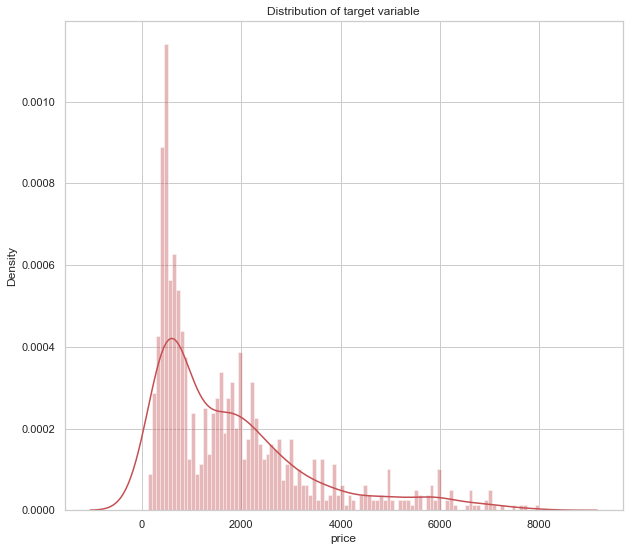

In [11]:
sns.set_theme(style="whitegrid")


plt.figure(figsize=(10, 9))
plt.title('Distribution of target variable')
sns.distplot(df['price'], color='r', bins=100)
plt.show()

Посмотрим на тип обуви: мужской обуви намного больше женской. Кроме того, в данных много выбросов. 

In [7]:
df['Shoe Type'].value_counts()

Men      806
Women    209
Name: Shoe Type, dtype: int64

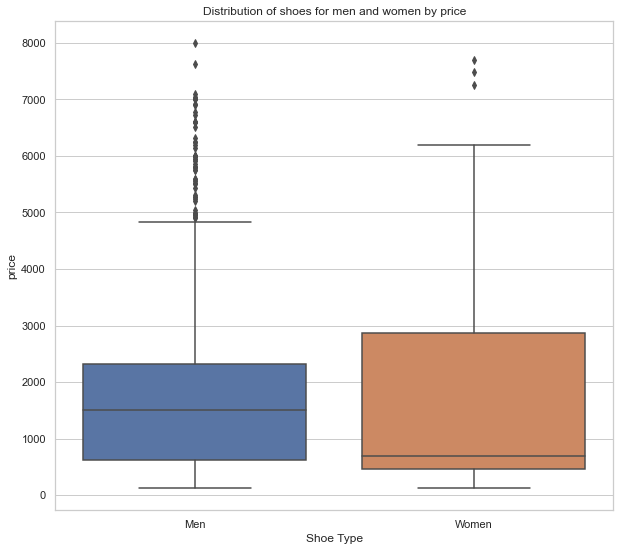

In [14]:
plt.figure(figsize=(10, 9))
plt.title('Distribution of shoes for men and women by price')
sns.boxplot(x="Shoe Type", y="price", data=df)
plt.show()

Создадим новый датафрейм, в котором будут только столбцы с самими отзывами и их оценками. В будущем для классификации нам понадобится столбец rating, но сейчас в нём содержатся continious данные, а не категориальные. Для этого преобразуем их в пятибальную шкалу. 

In [15]:
reviews_list = [j for i in df.reviews.to_list() for j in i.split('||')]


ratings_list = [int(j.split()[0][0]) for 
                    i in df.reviews_rating.to_list() for 
                    j in i.split('||')]

In [16]:
revised_df = pd.DataFrame(list(zip(reviews_list, ratings_list)),
               columns =['review', 'rating'])
revised_df.drop_duplicates(inplace=True)
revised_df.drop(revised_df[revised_df.review == ''].index)

,review,rating
0,Not happy with product,1
1,It's not as expected.,1
2,AVERAGE PRODUCT,3
3,Pic more beautiful,3
4,Got damage product. But quality is average fo...,3
...,...,...
8198,Great shoe,5
8199,excellent quality,5
8200,Old manufactured products being sold.,3
8202,Old stock teared in just 1.5 month of running,1


Увы, отзывы совершенно не сбалансированы :(
В основном люди ставят либо самую высокую, либо самую низкую оценку. В идеале можно было бы прибегнуть к downsampling, но количество данных в датасете достаточно невелико. 

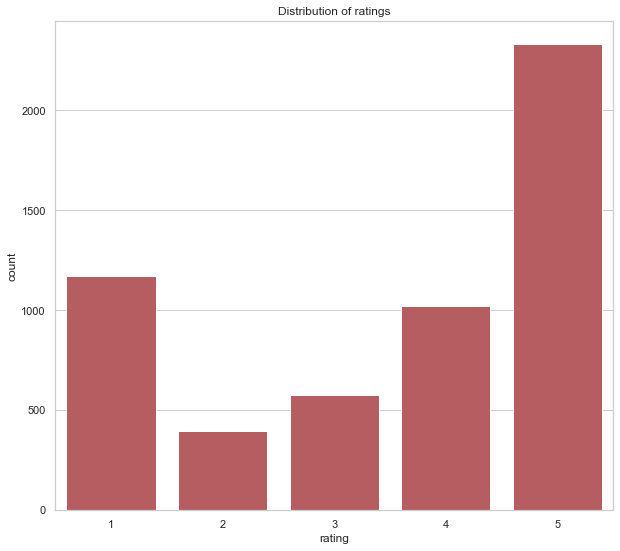

In [17]:
plt.figure(figsize=(10, 9))
plt.title('Distribution of ratings')
sns.countplot(x='rating', data=revised_df, color='r')
plt.show()

### Preprocessing

Для начала приведём текст к нижнему регистру. Скорее всего, это никак не повлияет на наши результаты моделей, но так будет быстрее и экономнее: незачем хранить две варианта (заглавный и прописной) одного слова.

In [18]:
# convert to lowercase
revised_df['review'] = revised_df['review'].str.lower()

Удаляем стоп-слова и лемматизируем. Я решила оставить пунктуацию, потому что вдруг она влият на экспрессивность: наличие восклицательных знаков, возможно, более характерно для худших (1) или лучших отзывов (5). Кроме того, я удалила все неанглийские слова и эмодзи, но вообще эмодзи можно было бы проанализировать с помощью EmojiToVec (но для этого нужен контекст, на который наши модели не смотрят). 

In [51]:
# remove stopwords and lemmatize words
nlp = spacy.load('en_core_web_sm')

def preprocessing(text, m):
    stop = set(stopwords.words('english'))
    tokens = nlp(text)
    words = ' '.join([word.lemma_ for word in tokens
                      if word.lemma_ not in stop])
    return words

In [52]:
df['product_description'] = df['product_description'].apply(lambda x: preprocessing(x, nlp))
revised_df['review'] = revised_df['review'].apply(lambda x: preprocessing(x, nlp))

### 1: Предсказание цены по описанию товара

Данную задачу будем решать с помощью <i>регресии</i>, потому что мы хотим предсказать число.

Далее произведём векторизацию.

<b>TF-IDF</b>

In [53]:
X = df['product_description'].to_list()
y = df['price'].to_list()

In [54]:
tfidf = TfidfVectorizer()
tfidf_feat = tfidf.fit_transform(X).todense()

In [64]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_feat, 
                                                    df['price'].values,
                                                    test_size = 0.2, 
                                                    random_state=42)

Сделаем визуализацию для распределения features. 

Text(0.5, 1.0, 'Feature distribution in 2-dim space')

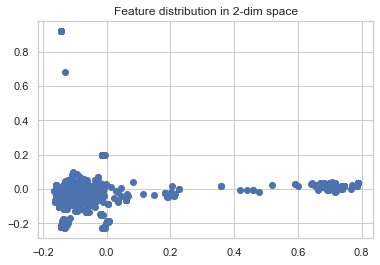

In [65]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(tfidf_feat)


plt.scatter(X_pca[:,0], X_pca[:,1])
plt.title('Feature distribution in 2-dim space')

In [177]:
def MSE(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    print('MSE: %2.3f' % mse)
    return mse


def MAE(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    print('MAE: %2.3f' % mae)
    return mae


def RMSE(y_true, y_pred):
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    print('RMSE: %2.3f' % rmse)
    return rmse

<b>Linear Regression</b>

In [68]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [77]:
MSE(y_test, y_pred)
MAE(y_test, y_pred)
RMSE(y_test, y_pred)

MSE: 52501232779130295669154790768640.000
MAE: 3394689148784002.000
RMSE: 7245773442437342.000


7245773442437342.0

<b>RandomForest</b>

In [89]:
rf = RandomForestRegressor()
gs = GridSearchCV(rf,
                  param_grid = {
                      'n_estimators': range(50, 210, 50),
                      'max_depth': range(100, 1100, 300),                      
                  })

forest = gs.fit(X_train, y_train)

In [90]:
MSE(y_test, forest.predict(X_test))
MAE(y_test, forest.predict(X_test))
RMSE(y_test, forest.predict(X_test))

MSE: 1598580.508
MAE: 776.465
RMSE: 1264.350


1264.3498361526981

<b>ElasticNet</b>

In [91]:
en = ElasticNet()
gs = GridSearchCV(en,
                  param_grid = {
                     'alpha': np.arange(0, 1.2, 0.2),
                     'l1_ratio': np.arange(0, 1.2, 0.2)
                 })

elastic = gs.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37336810.561549194, tolerance: 155172.57585792753
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selectio

In [92]:
MSE(y_test, elastic.predict(X_test))
MAE(y_test, elastic.predict(X_test))
RMSE(y_test, elastic.predict(X_test))

MSE: 1562320.053
MAE: 811.284
RMSE: 1249.928


1249.9280190365967

<b>Ridge</b>

In [93]:
rid = Ridge()
gs = GridSearchCV(rid,
                 param_grid = {
                     'alpha': [100, 200, 250, 300]
                 })

ridge = gs.fit(X_train, y_train)

In [94]:
MSE(y_test, ridge.predict(X_test))
MAE(y_test, ridge.predict(X_test))
RMSE(y_test, ridge.predict(X_test))

MSE: 2341466.461
MAE: 1125.245
RMSE: 1530.185


1530.1851067442387

<b>Lasso</b>

In [95]:
las = Lasso()
gs = GridSearchCV(las,
                 param_grid = {
                     'alpha': np.linspace(0, 0.2, 21)
                 })

lasso = gs.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37336810.561549194, tolerance: 155172.57585792753
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selectio

In [96]:
MSE(y_test, lasso.predict(X_test))
MAE(y_test, lasso.predict(X_test))
RMSE(y_test, lasso.predict(X_test))

MSE: 1588119.150
MAE: 801.876
RMSE: 1260.206


1260.2059950299615

Получилось, что лучшие результаты показал RandomForest, а хуже –– простая линейная регрессия. В целом это ожидаемые результаты. 

<b>BoW</b>

Теперь проделаем то же самое, только для BoW.

In [98]:
X = df['product_description'].to_list()
y = df['price'].to_list()

In [99]:
vectorizer = CountVectorizer()
bow_feat = vectorizer.fit_transform(X).todense()

In [100]:
X_train, X_test, y_train, y_test = train_test_split(bow_feat, 
                                                    df['price'].values,
                                                    test_size = 0.2, 
                                                    random_state=42)

Посмотрим на распределние features.

Text(0.5, 1.0, 'Feature distribution in 2-dim space')

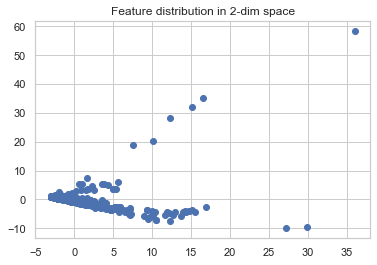

In [101]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(bow_feat)


plt.scatter(X_pca[:,0], X_pca[:,1])
plt.title('Feature distribution in 2-dim space')

<b>Linear Regression</b>

In [102]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [103]:
MSE(y_test, y_pred)
MAE(y_test, y_pred)
RMSE(y_test, y_pred)

MSE: 7031207707718215871231028101120.000
MAE: 946913284298699.375
RMSE: 2651642454728430.500


2651642454728430.5

<b>ElasticNet</b>

In [106]:
en = ElasticNet()
gs = GridSearchCV(en,
                  param_grid = {
                     'alpha': np.arange(0, 1.2, 0.2),
                     'l1_ratio': np.arange(0, 1.2, 0.2),
                 },
                 scoring=make_scorer(mean_squared_error, greater_is_better=False))

elastic = gs.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38998299.5673176, tolerance: 155172.57585792753
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/

In [107]:
MSE(y_test, elastic.predict(X_test))
MAE(y_test, elastic.predict(X_test))
RMSE(y_test, elastic.predict(X_test))

MSE: 1712367.454
MAE: 847.709
RMSE: 1308.575


1308.574588802092

<b>Ridge</b>

In [108]:
rid = Ridge()
gs = GridSearchCV(rid,
                 param_grid = {
                     'alpha': [100, 200, 250, 300]
                 },
                  scoring=make_scorer(mean_squared_error, greater_is_better=False))

ridge = gs.fit(X_train, y_train)

In [109]:
MSE(y_test, ridge.predict(X_test))
MAE(y_test, ridge.predict(X_test))
RMSE(y_test, ridge.predict(X_test))

MSE: 1670921.537
MAE: 857.434
RMSE: 1292.641


1292.6413023784573

<b>RandomForest</b>

In [110]:
rf = RandomForestRegressor()
gs = GridSearchCV(rf,
                  param_grid = {
                      'n_estimators': range(50, 210, 50),
                      'max_depth': range(100, 1100, 300),                      
                  },
                  scoring=make_scorer(mean_squared_error, greater_is_better=False))

forest = gs.fit(X_train, y_train)

In [111]:
MSE(y_test, forest.predict(X_test))
MAE(y_test, forest.predict(X_test))
RMSE(y_test, forest.predict(X_test))

MSE: 1558986.579
MAE: 736.934
RMSE: 1248.594


1248.593840501087

<b>Lasso</b>

In [112]:
las = Lasso()
gs = GridSearchCV(las,
                 param_grid = {
                     'alpha': np.linspace(0, 0.2, 21)
                 },
                  scoring=make_scorer(mean_squared_error, greater_is_better=False))

lasso = gs.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38998299.5673176, tolerance: 155172.57585792753
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/

In [113]:
MSE(y_test, lasso.predict(X_test))
MAE(y_test, lasso.predict(X_test))
RMSE(y_test, lasso.predict(X_test))

MSE: 3646540.784
MAE: 1172.390
RMSE: 1909.592


1909.5917847230185

Можно заметить, что результаты получились примерно такие же: RandomForest лучше всего справляется с поставленной задачей, линейная регрессия –– хуже. Однако, когда дело доходит до извлечённых признаков, то тут получились смещанные результаты. Какие-то модели чуть лучше справляются при помощии TF-IDF, какие-то с BoW. 

### 2: Предсказание оценки товара пользователем по его отзыву

Это задание <i>классификации</i>, так как оценка принадлежит к конечному классу.

Далее процесс почти аналогичен тому, что показан в первом задании.

<b>TF-IDF</b>

In [135]:
X = revised_df['review'].to_list()
y = revised_df['rating'].to_list()

In [137]:
tfidf = TfidfVectorizer()
tfidf_feat = tfidf.fit_transform(X).todense()

In [138]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_feat, 
                                                    revised_df['rating'].values,
                                                    test_size = 0.2, 
                                                    random_state=42)

Посмотрим на распределение данных с помощью PCA.

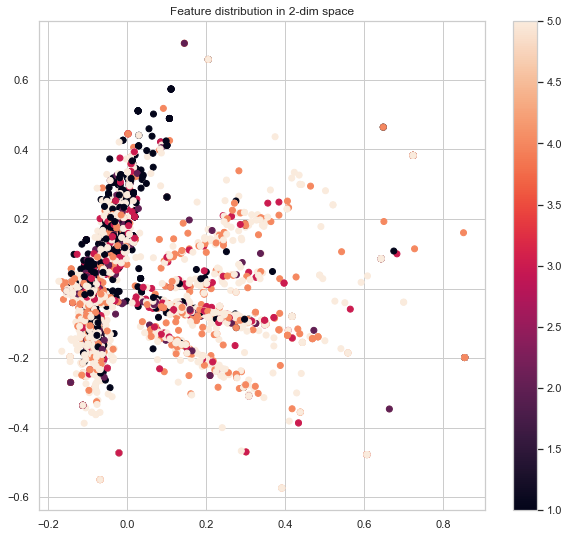

In [139]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(tfidf_feat)


plt.figure(figsize=(10, 9))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title('Feature distribution in 2-dim space')
plt.colorbar()

<b>Linear Classification</b>

In [142]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(model.predict(X_test), y_test))

              precision    recall  f1-score   support

           1       0.59      0.68      0.63       210
           2       0.01      0.11      0.02         9
           3       0.10      0.28      0.15        36
           4       0.07      0.22      0.11        59
           5       0.94      0.61      0.74       785

    accuracy                           0.59      1099
   macro avg       0.34      0.38      0.33      1099
weighted avg       0.79      0.59      0.66      1099



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


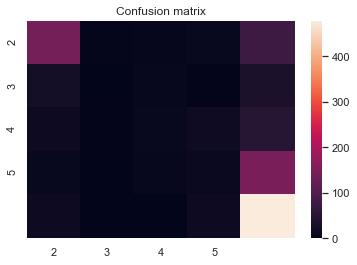

In [151]:
sns.heatmap(confusion_matrix(y_test, y_pred),
            xticklabels=model.classes_[1:], yticklabels=model.classes_[1:])
plt.title('Confusion matrix')
plt.show()

Как мы выдели выше, лучше всего в наших данных представлен 5 класс, за ним следует 1. Качество 5 класса – 0.74, второй за ним опять 1 класс – 0.63. Качество получилось не очень высокое, но важно помнить, что у нас была достаточно несбалансированная выборка.

<b>KNN</b>

In [145]:
knn = KNeighborsClassifier()
gs = GridSearchCV(knn,
                  param_grid = {
                      'n_neighbors': range(2, 10, 50),           
                  })


knn = gs.fit(X_train, y_train)

In [148]:
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           1       0.42      0.66      0.51       242
           2       0.12      0.18      0.14        72
           3       0.14      0.14      0.14        96
           4       0.21      0.27      0.23       178
           5       0.66      0.37      0.48       511

    accuracy                           0.38      1099
   macro avg       0.31      0.32      0.30      1099
weighted avg       0.45      0.38      0.39      1099



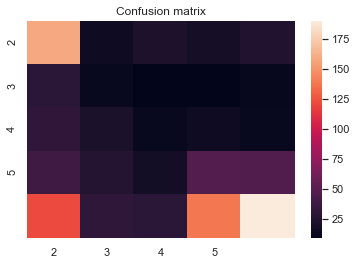

In [152]:
sns.heatmap(confusion_matrix(y_test, knn.predict(X_test)),
            xticklabels=model.classes_[1:], yticklabels=model.classes_[1:])
plt.title('Confusion matrix')
plt.show()

KNN показывает результаты намного хуже, потому что алгоритм ближайших соседей не обязательно указывает нам на объектов одного класс. Качество модели (f-score) намного хуже в этом случае.

In [154]:
mnb = MultinomialNB()
gs = GridSearchCV(mnb,
                 param_grid = {
                     'alpha': (0.1, 0.5, 1.0)
                 })


multinoinal = gs.fit(X_train, y_train)

In [156]:
print(classification_report(y_test, multinoinal.predict(X_test)))

              precision    recall  f1-score   support

           1       0.65      0.58      0.62       242
           2       0.00      0.00      0.00        72
           3       0.25      0.08      0.12        96
           4       0.21      0.08      0.12       178
           5       0.60      0.92      0.73       511

    accuracy                           0.58      1099
   macro avg       0.34      0.33      0.32      1099
weighted avg       0.48      0.58      0.50      1099



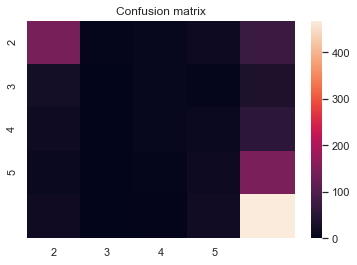

In [157]:
sns.heatmap(confusion_matrix(y_test, multinoinal.predict(X_test)),
            xticklabels=model.classes_[1:], yticklabels=model.classes_[1:])
plt.title('Confusion matrix')
plt.show()

Получилось очень похоже на результаты линейной классификации.

In [158]:
rf = RandomForestClassifier()
gs = GridSearchCV(rf,
                  param_grid = {
                      'n_estimators': range(50, 210, 50),
                      'max_depth': range(100, 1100, 300),                      
                  })


forest = gs.fit(X_train, y_train)

In [159]:
print(classification_report(y_test, forest.predict(X_test)))

              precision    recall  f1-score   support

           1       0.72      0.53      0.61       242
           2       0.38      0.04      0.07        72
           3       0.27      0.12      0.17        96
           4       0.15      0.05      0.08       178
           5       0.57      0.90      0.70       511

    accuracy                           0.56      1099
   macro avg       0.42      0.33      0.33      1099
weighted avg       0.50      0.56      0.49      1099



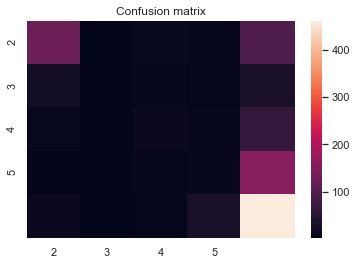

In [160]:
sns.heatmap(confusion_matrix(y_test, forest.predict(X_test)),
            xticklabels=model.classes_[1:], yticklabels=model.classes_[1:])
plt.title('Confusion matrix')
plt.show()

Аналогично, результаты очень похоже на предыдущие модели (кроме KNN), но качество совсем немного хуже (0.70 и 0.61), если сравнивать.

<b>BoW</b>

То же самое для BoW.

In [117]:
X = revised_df['review'].to_list()
y = revised_df['rating'].to_list()

In [118]:
vectorizer = CountVectorizer()
bow_feat = vectorizer.fit_transform(X).todense()

In [161]:
X_train, X_test, y_train, y_test = train_test_split(bow_feat, 
                                                    revised_df['rating'].values,
                                                    test_size = 0.2, 
                                                    random_state=42)

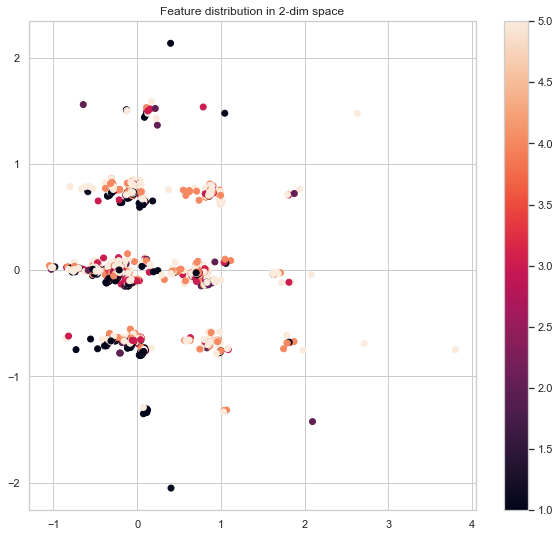

In [162]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(bow_feat)


plt.figure(figsize=(10, 9))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title('Feature distribution in 2-dim space')
plt.colorbar()

In [163]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       0.60      0.68      0.64       214
           2       0.03      0.12      0.04        17
           3       0.12      0.26      0.17        46
           4       0.11      0.26      0.16        78
           5       0.90      0.62      0.73       744

    accuracy                           0.58      1099
   macro avg       0.35      0.39      0.35      1099
weighted avg       0.74      0.58      0.64      1099



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


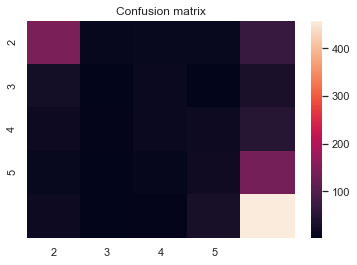

In [164]:
sns.heatmap(confusion_matrix(y_test, y_pred),
            xticklabels=model.classes_[1:], yticklabels=model.classes_[1:])
plt.title('Confusion matrix')
plt.show()

In [165]:
knn = KNeighborsClassifier()
gs = GridSearchCV(knn,
                  param_grid = {
                      'n_neighbors': range(2, 10, 50),           
                  })


knn = gs.fit(X_train, y_train)

In [166]:
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           1       0.43      0.66      0.52       242
           2       0.07      0.11      0.09        72
           3       0.15      0.19      0.17        96
           4       0.20      0.25      0.22       178
           5       0.68      0.37      0.48       511

    accuracy                           0.38      1099
   macro avg       0.31      0.32      0.30      1099
weighted avg       0.46      0.38      0.40      1099



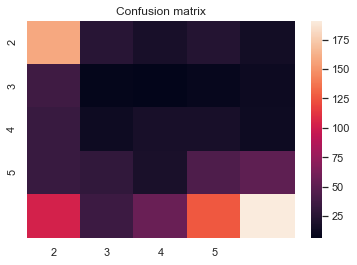

In [167]:
sns.heatmap(confusion_matrix(y_test, knn.predict(X_test)),
            xticklabels=model.classes_[1:], yticklabels=model.classes_[1:])
plt.title('Confusion matrix')
plt.show()

In [168]:
mnb = MultinomialNB()
gs = GridSearchCV(mnb,
                 param_grid = {
                     'alpha': (0.1, 0.5, 1.0)
                 })


multinoinal = gs.fit(X_train, y_train)

In [169]:
print(classification_report(y_test, multinoinal.predict(X_test)))

              precision    recall  f1-score   support

           1       0.66      0.60      0.63       242
           2       0.00      0.00      0.00        72
           3       0.24      0.11      0.16        96
           4       0.23      0.10      0.14       178
           5       0.61      0.90      0.73       511

    accuracy                           0.58      1099
   macro avg       0.35      0.34      0.33      1099
weighted avg       0.49      0.58      0.51      1099



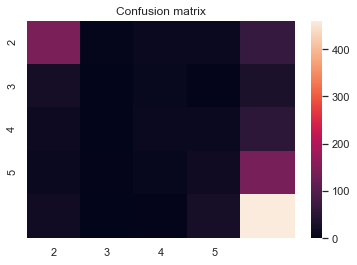

In [170]:
sns.heatmap(confusion_matrix(y_test, multinoinal.predict(X_test)),
            xticklabels=model.classes_[1:], yticklabels=model.classes_[1:])
plt.title('Confusion matrix')
plt.show()

In [171]:
rf = RandomForestClassifier()
gs = GridSearchCV(rf,
                  param_grid = {
                      'n_estimators': range(50, 210, 50),
                      'max_depth': range(100, 1100, 300),                      
                  })


forest = gs.fit(X_train, y_train)

In [172]:
print(classification_report(y_test, forest.predict(X_test)))

              precision    recall  f1-score   support

           1       0.67      0.51      0.58       242
           2       0.15      0.03      0.05        72
           3       0.22      0.08      0.12        96
           4       0.12      0.05      0.07       178
           5       0.57      0.88      0.70       511

    accuracy                           0.54      1099
   macro avg       0.35      0.31      0.30      1099
weighted avg       0.46      0.54      0.48      1099



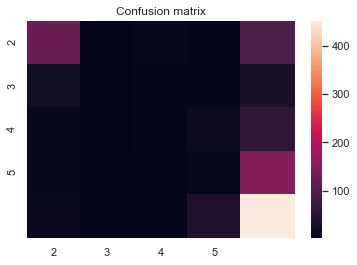

In [173]:
sns.heatmap(confusion_matrix(y_test, forest.predict(X_test)),
            xticklabels=model.classes_[1:], yticklabels=model.classes_[1:])
plt.title('Confusion matrix')
plt.show()

Таким образом, в первом задании лучше всего справился RandomForest на векторах BoW, а во втором –– примерно одинаково хорошо справились линейная классификация и мультиномиальный наивный баес. 

BoW даёт очень похожие результаты: они слегла хуже, чем у TF-IDF. Возможно, дело в том, что у нас правда очень мало данных, более того –– выборка очень несбалансированная, поэтому не следует делать строгих выборов. В будущем нужно решить проблему дисбаланса классов. Как я уже писала выше, в других моделях (контекстных) можно было бы проанализировать эмодзи. Ещё было бы здорово, если бы у нас были данные о гендере покупателей: отдельно посмотреть на гендер людей, которые покупают мужскую и женскую обувь, влияет ли это как-то на оценку покупки. 